In [49]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [50]:
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=font_path, size=12).get_name()
plt.rc('font', family=font_name)

In [51]:
file_paths = ['dataset D1.xlsx', 'dataset D2.xlsx', 'dataset D3.xlsx']
df1 = pd.read_excel(file_paths[0])

In [45]:
len(df1)

58268

In [48]:
average_length = df1['text'].apply(lambda x: len(x)).mean()
print("Average sentence length:", average_length)

Average sentence length: 35.32125695064186


In [52]:
grouped_df = df1.groupby('types')
grouped_dfs = [group for _, group in grouped_df]

In [53]:
for i, df in enumerate(grouped_dfs):
    print(f"Group {i+1}:")
    print('샘플수', len(df))
    print('types 값:', df['types'].unique())

Group 1:
샘플수 7339
types 값: ['기쁨']
Group 2:
샘플수 9804
types 값: ['당황']
Group 3:
샘플수 10417
types 값: ['분노']
Group 4:
샘플수 10431
types 값: ['불안']
Group 5:
샘플수 10149
types 값: ['상처']
Group 6:
샘플수 10128
types 값: ['슬픔']


In [56]:
grouped_dfs[0].sample(10)

text types
2139                            참신한 아이디어에 제대로 구성해서 완성했어.    기쁨
26307                                나 이번에 우리 과 대표를 맡았어.    기쁨
6524                                      결국 명예퇴직을 결심했어.    기쁨
32860                                 이직 성공해서 마음이 느긋해졌어.    기쁨
34365  몸이 안 좋아 입원 중인데 어린 손자들이 병문안을 와서 애교도 부리고 말하는 걸 보...    기쁨
4059                              나 정말 기분이 좋아! 날아갈 거 같아.    기쁨
14638            이 나이에도 건강하게 술을 즐길 수 있는 게 제일 큰 축복인 것 같아.    기쁨
17455  나도 드디어 회사에 입사하게 됐어. 친구들 중에서 나만 입사를 못해서 불안했었는데 ...    기쁨
20350  남편 회사 사람들이 유흥주점에 간 일로 난리가 났었는데 우리 남편만 가지 않았어. ...    기쁨
5048                             나 최종 합격했어. 나도 이제 직장인이야.    기쁨

In [80]:
pd.set_option('display.max_colwidth', None)
grouped_dfs[2].sample(10)

text types
48137  멋진 가수가 되길 원했는데 앨범도 실패하고 이젠 뭘 해야 할지 모를 정도로 내가 너무 실망스러워.    분노
9893                                          노후를 생각하면 참 답답해.    분노
51784      어릴 때 모든 사람들의 관심을 받았던 친구가 지금 굉장히 불행하게 산다네. 너무 화가 나.    분노
11764                                진짜 상사 때문에 너무 화가 나고 열 받아.    분노
57523                                 이번에 약이 바뀌었는데 정말 구역질이 나.    분노
4402                           나 오늘 친구랑 말다툼을 심하게 했어. 너무 열 받아.    분노
38888                 먼저 살던 동네 할머니가 돌아가셨다는 부고를 받았어. 오래 투병하셨는데    분노
7300      곧 아이가 태어나는데 난 여자아이를 원해. 남자아이가 태어나면 좋은 부모가 되지 못할 거야.    분노
11024                                          요즘 일이 너무 많아졌어.    분노
28518                                요즘은 하고 싶은 일도 없고 만사가 귀찮아.    분노

In [6]:
# Initialize variables
max_length = 5000
emotion_sentences = []

# Iterate through each dataframe in grouped_dfs
for df in grouped_dfs:
    current_length = 0
    current_string = ""
    result = []
    # Iterate through each text in the dataframe
    for text in df['text']:
        # Check if adding the current text will exceed the maximum length
        if current_length + len(text) <= max_length:
            current_string += (text + ' ')
            current_length += len(text)+1
        else:
            # Add the current string to the result list and reset variables
            result.append(current_string.strip())
            current_string = text + ' '
            current_length = len(text)+1
    emotion_sentences.append(result)

In [7]:
len(emotion_sentences)

6

In [10]:
ACCESS_KEY = '#####USER_ACCESS_KEY#####' #your own key
ANALYSIS_CODE = 'ner'

In [11]:
import urllib3
import json

In [12]:
openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"

accessKey = ACCESS_KEY
analysisCode = ANALYSIS_CODE

In [13]:
def get_etri_NERdata(text):
    try:
        requestJson = {
        "argument": {
            "text": text,
            "analysis_code": analysisCode
            }
        }
        
        http = urllib3.PoolManager()
        response = http.request(
            "POST",
            openApiURL,
            headers={"Content-Type": "application/json; charset=UTF-8", "Authorization" :  accessKey},
            body=json.dumps(requestJson)
        )
        
        if  response.status != 200:
            print("[error] %s" % response.data)
            return None
        
        result = str(response.data,"utf-8")
        return result
    
    except Exception as e:
        # Handle the exception
        print(e)
        return None

In [59]:
emotion_label = ['기쁨', '당황', '분노', '불안', '상처', '슬픔']
#emotion_label = ['기쁨', '당황', '무감정', '분노', '불안', '상처', '슬픔']
#emotion_label = ['공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오']

In [15]:
emotion_ner = {}
emotion_ner_count = {}

for i in range(len(emotion_sentences)):
    sentences = emotion_sentences[i]
    NE_dict = {}
    sentence_with_NE_count = 0
    for sentence in tqdm(sentences):
        result = get_etri_NERdata(sentence)
        if result != None:
            j = json.loads(result)
            for sent in j['return_object']['sentence']:
                NE_found = False  # 현재 문장에서 개체명을 찾았는지 여부
                for item in sent['NE']:
                    NE_tag = item['type']
                    word = item['text']
                    if NE_tag not in NE_dict:
                        NE_dict[NE_tag] = []
                    NE_dict[NE_tag].append(word)
                    NE_found = True
                if NE_found:
                    sentence_with_NE_count += 1
    emotion_ner[emotion_label[i]] = NE_dict
    emotion_ner_count[emotion_label[i]] = sentence_with_NE_count

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

In [16]:
emotion_ner.keys()

dict_keys(['기쁨', '당황', '분노', '불안', '상처', '슬픔'])

In [14]:
emotion_ner_count

{'기쁨': 5154, '당황': 7607, '분노': 7971, '불안': 7288, '상처': 7644, '슬픔': 7299}

In [22]:
for key, values in emotion_ner.items():
    print('####',key,'####', end='\t')
    print('개체명태그', len(values.keys()),'종류', end='\t')
    unique_word_count = 0
    word_count = 0
    for tag, words in values.items():
        unique_word_count += len(set(words))
        word_count += len(words)
    print(unique_word_count,'단어', end='\t')
    print(word_count,'회')
    

#### 기쁨 ####	개체명태그 96 종류	1058 단어	7709 회
#### 당황 ####	개체명태그 96 종류	1289 단어	11745 회
#### 분노 ####	개체명태그 97 종류	1242 단어	12124 회
#### 불안 ####	개체명태그 93 종류	1284 단어	10728 회
#### 상처 ####	개체명태그 99 종류	1254 단어	11409 회
#### 슬픔 ####	개체명태그 95 종류	1196 단어	10889 회


In [66]:
import matplotlib.pyplot as plt

def draw_bar_graph(emotion, top_n):
    
    # 각 키에 대한 값 리스트의 길이 계산
    length_dict = {key: len(values) for key, values in emotion_ner[emotion].items()}

    # 키와 값을 추출하고 값을 기준으로 내림차순 정렬
    sorted_items = sorted(length_dict.items(), key=lambda item: item[1], reverse=True)

    # 상위 top_n개 항목만 선택
    sorted_items_top = sorted_items[:top_n]

    # 상위 n개 항목을 다시 오름차순으로 정렬하여 높은 빈도의 개체가 위에 오도록 함
    sorted_items_top_reversed = sorted(sorted_items_top, key=lambda item: item[1])

    # 정렬된 키와 값을 분리
    keys, values = zip(*sorted_items_top_reversed)

    # 막대 그래프 그리기
    plt.figure(figsize=(6, 4), dpi=300)
    bars = plt.barh(keys, values, color='skyblue')

    # 막대 오른쪽 끝에 숫자 표시
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
                 f'{bar.get_width()}', 
                 va='center', ha='left')

    plt.xlabel('어휘 수')
    title = f'D1 \'{emotion}\' 텍스트의 주요 개체명 어휘 유형 (상위 10 종류)'
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

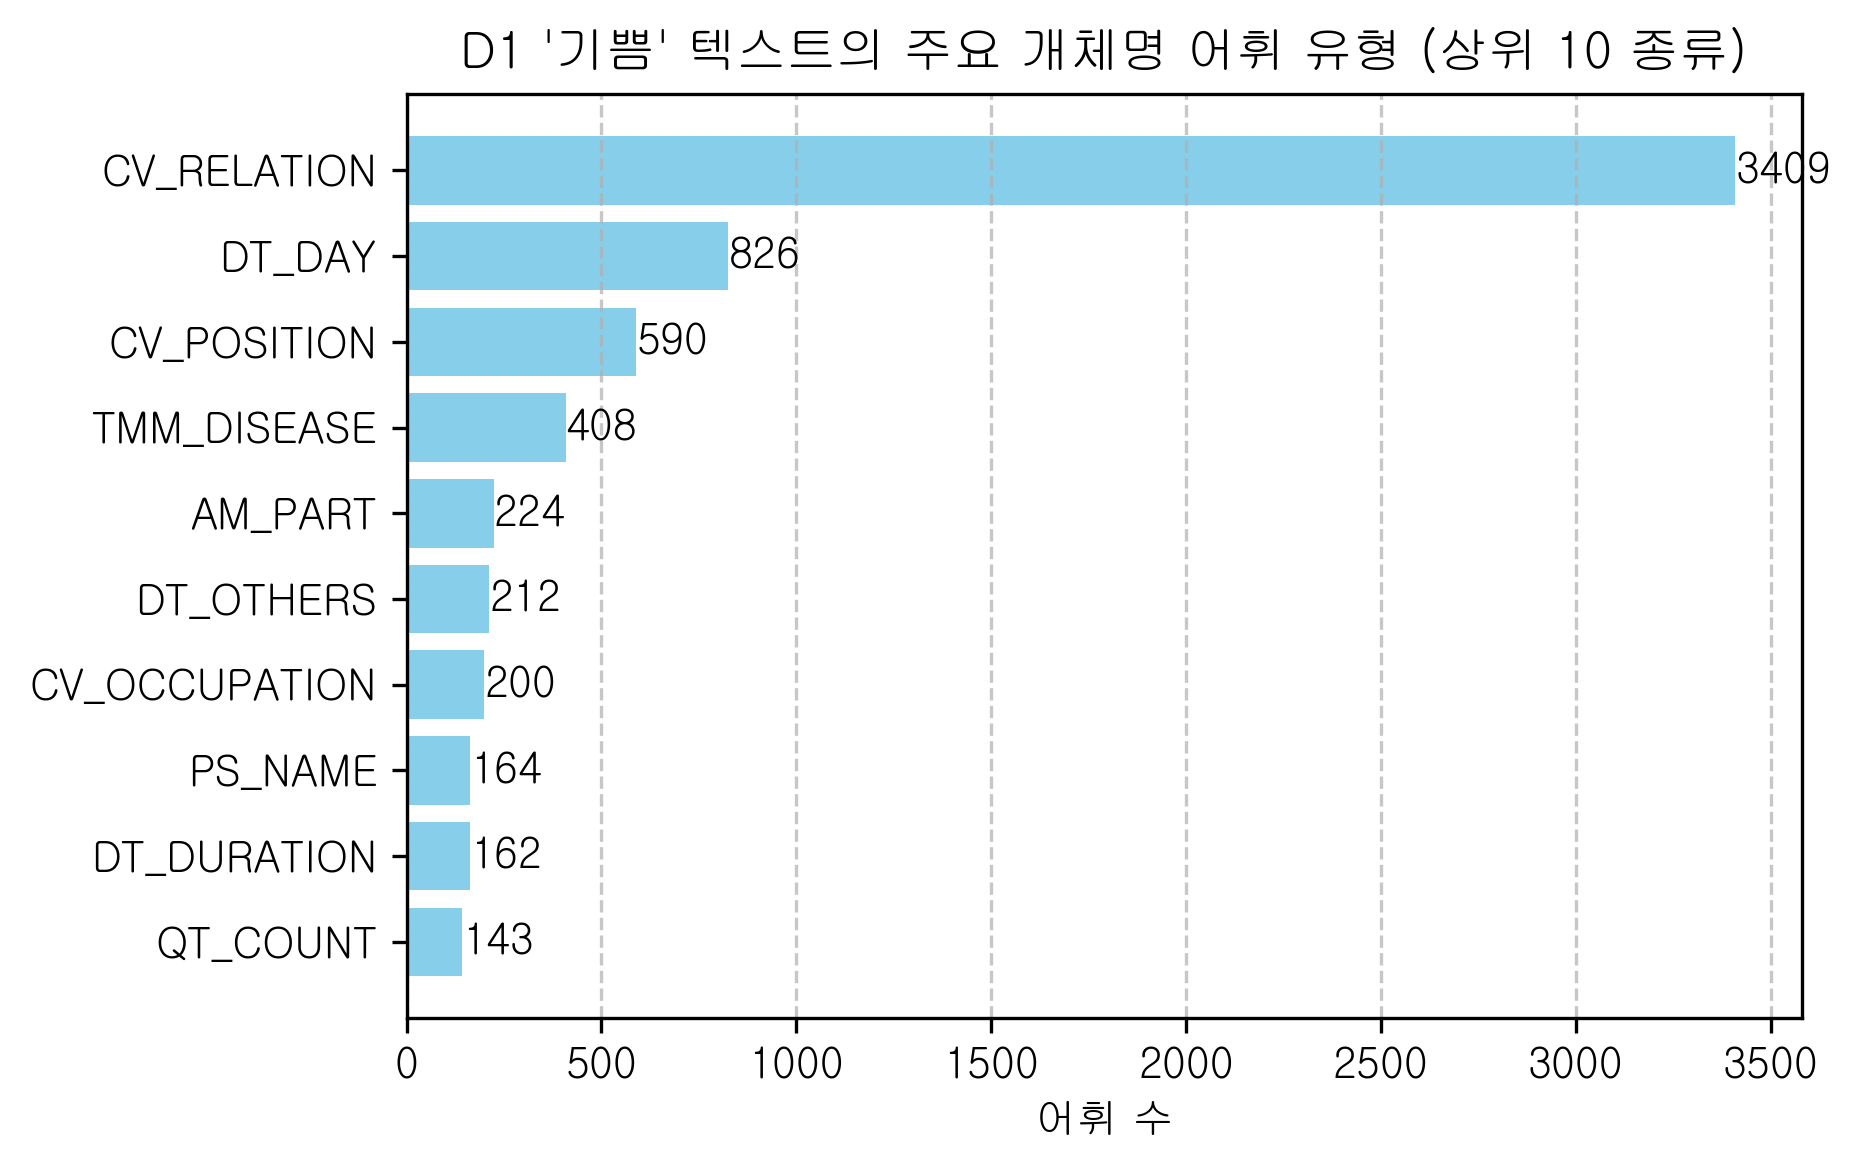

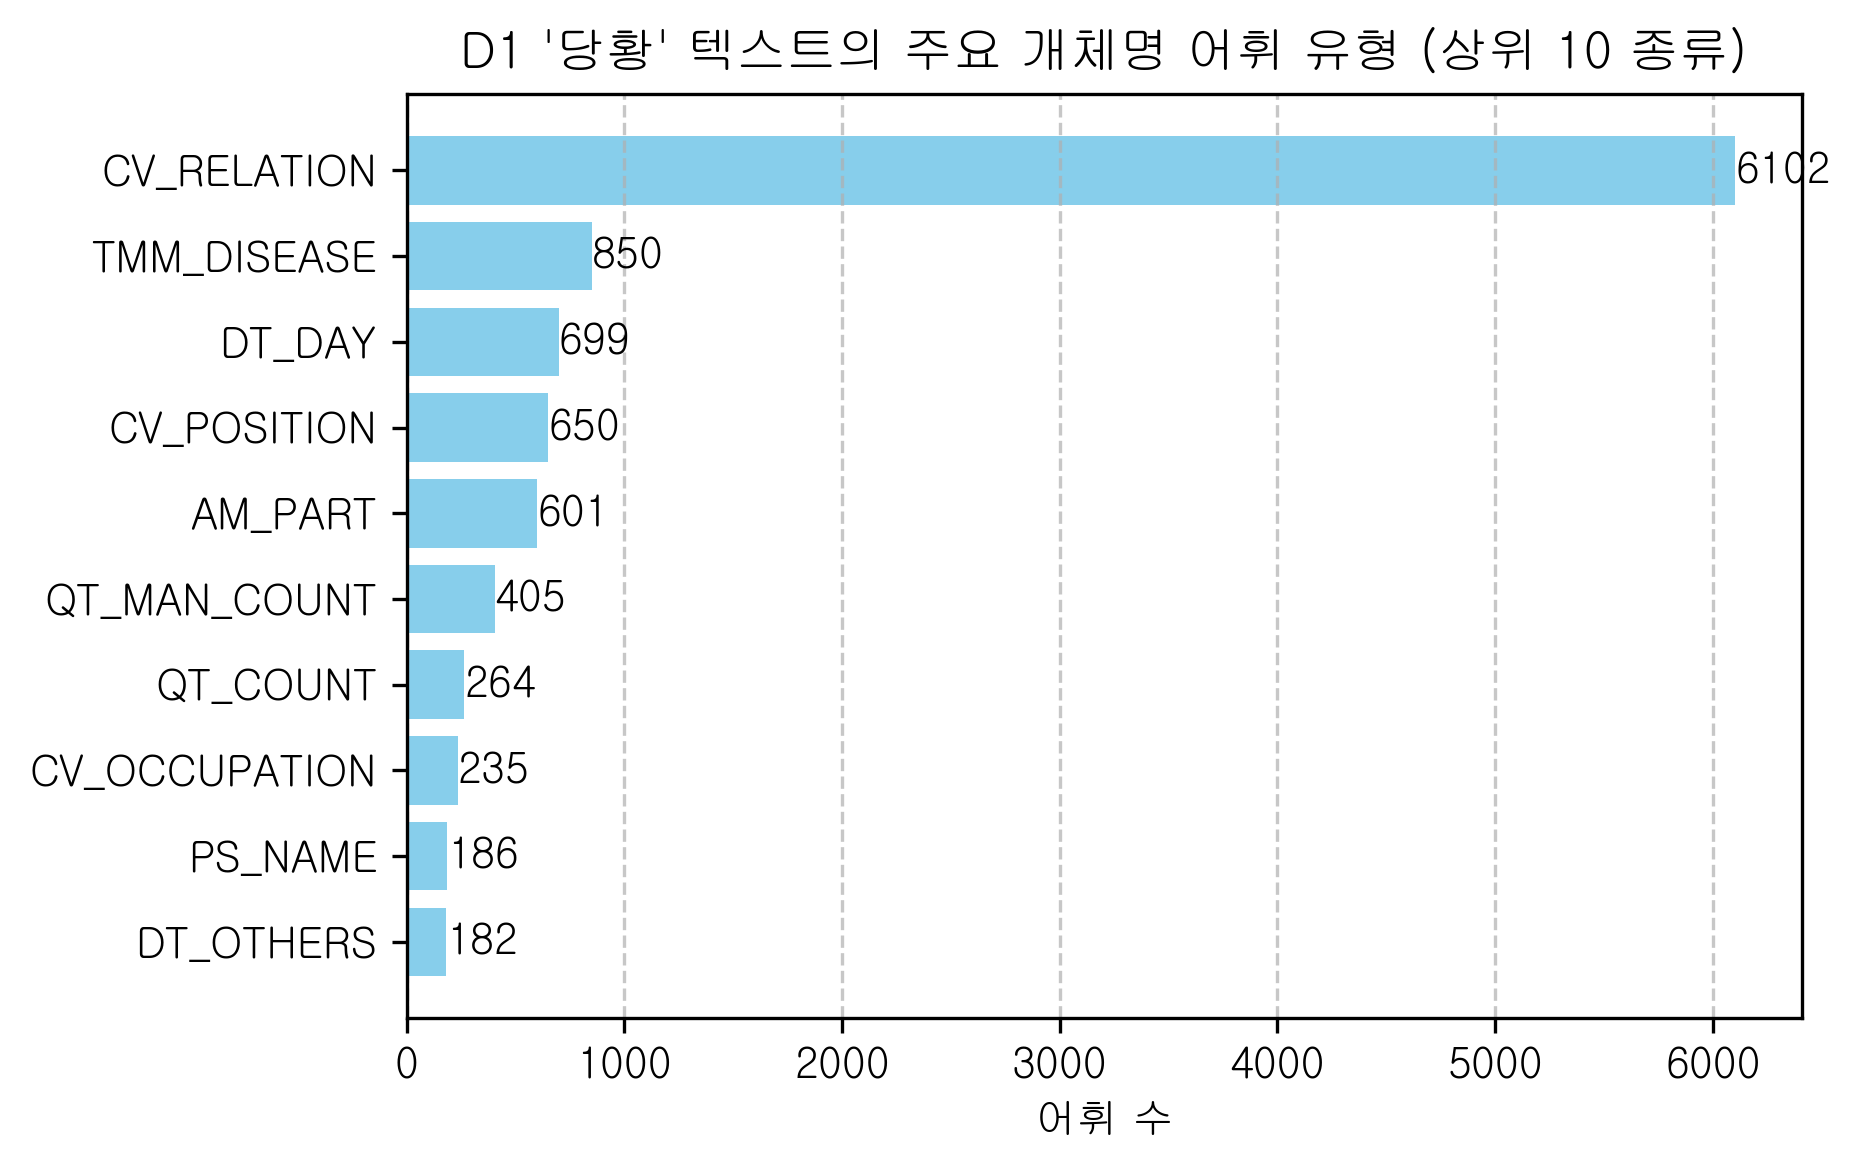

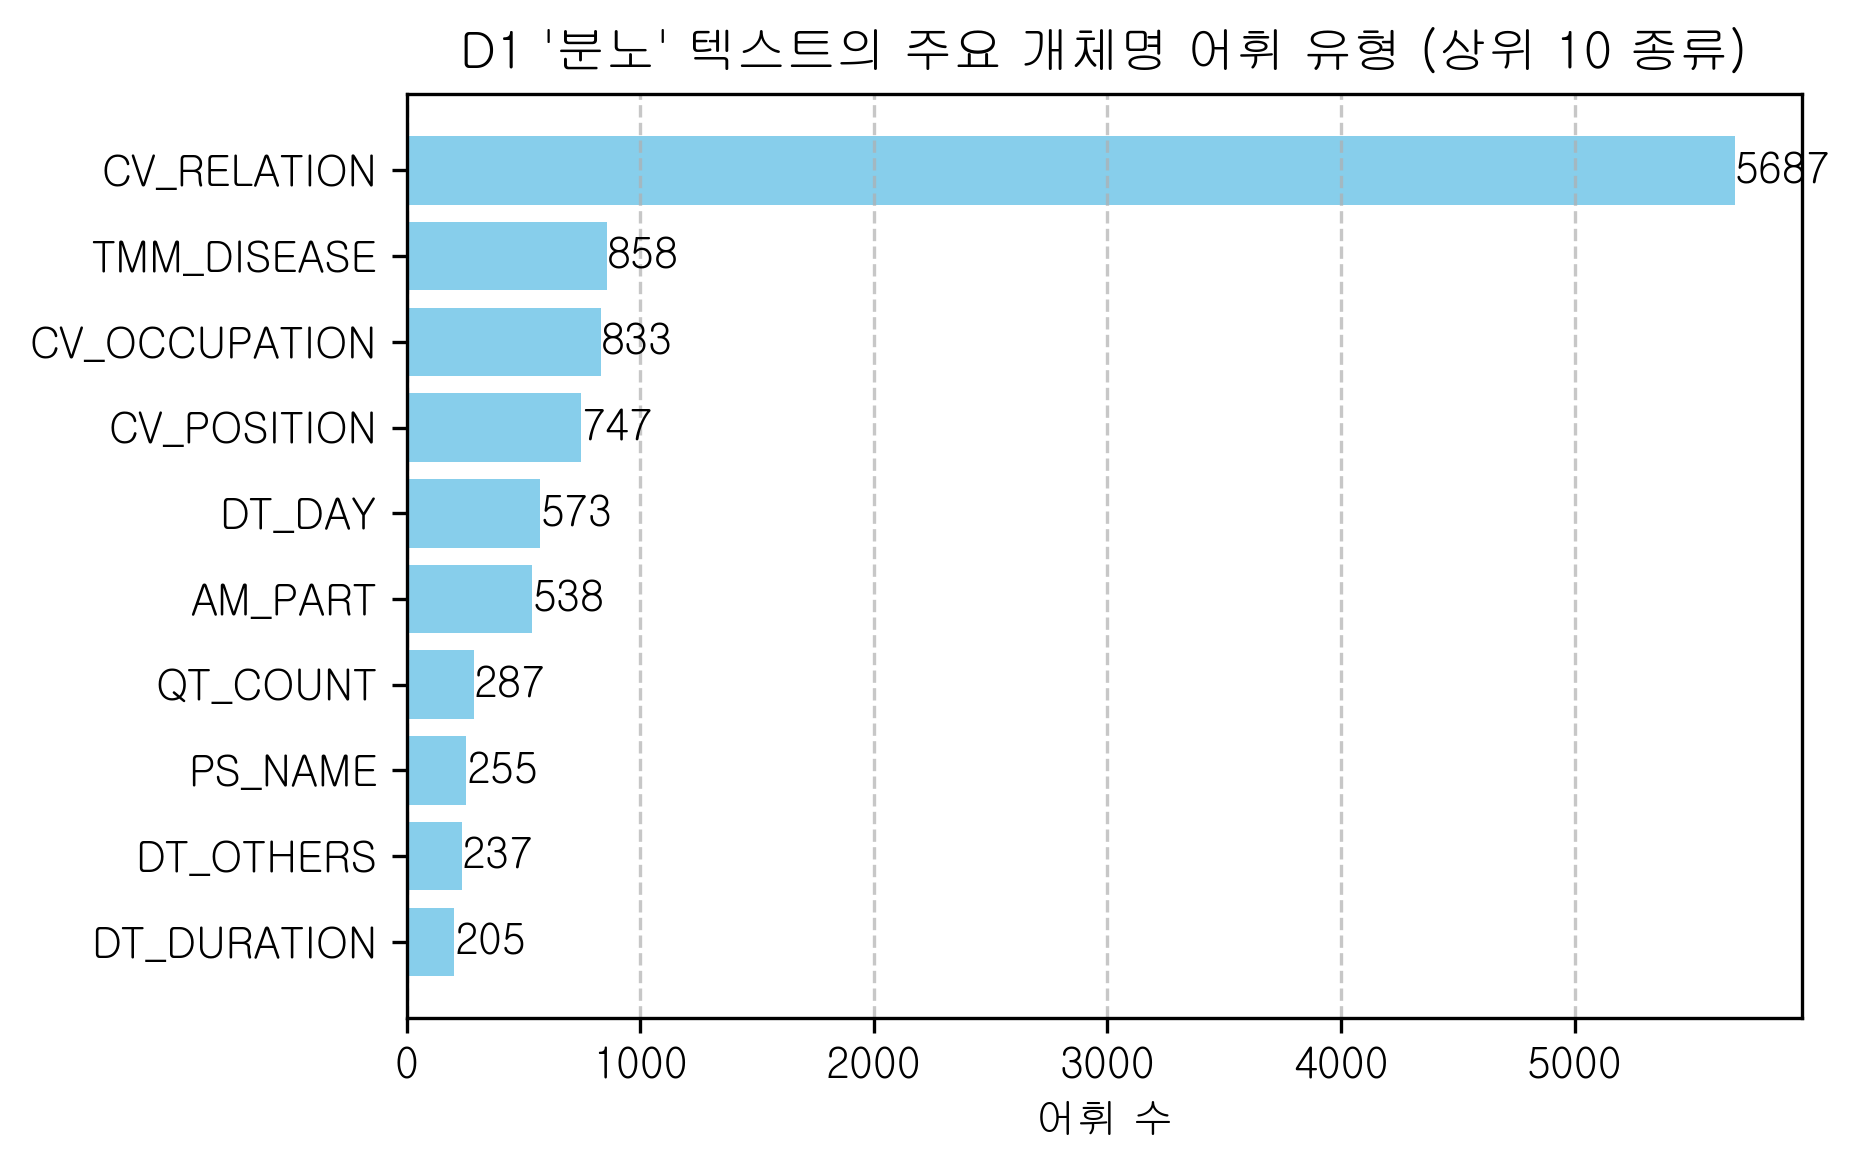

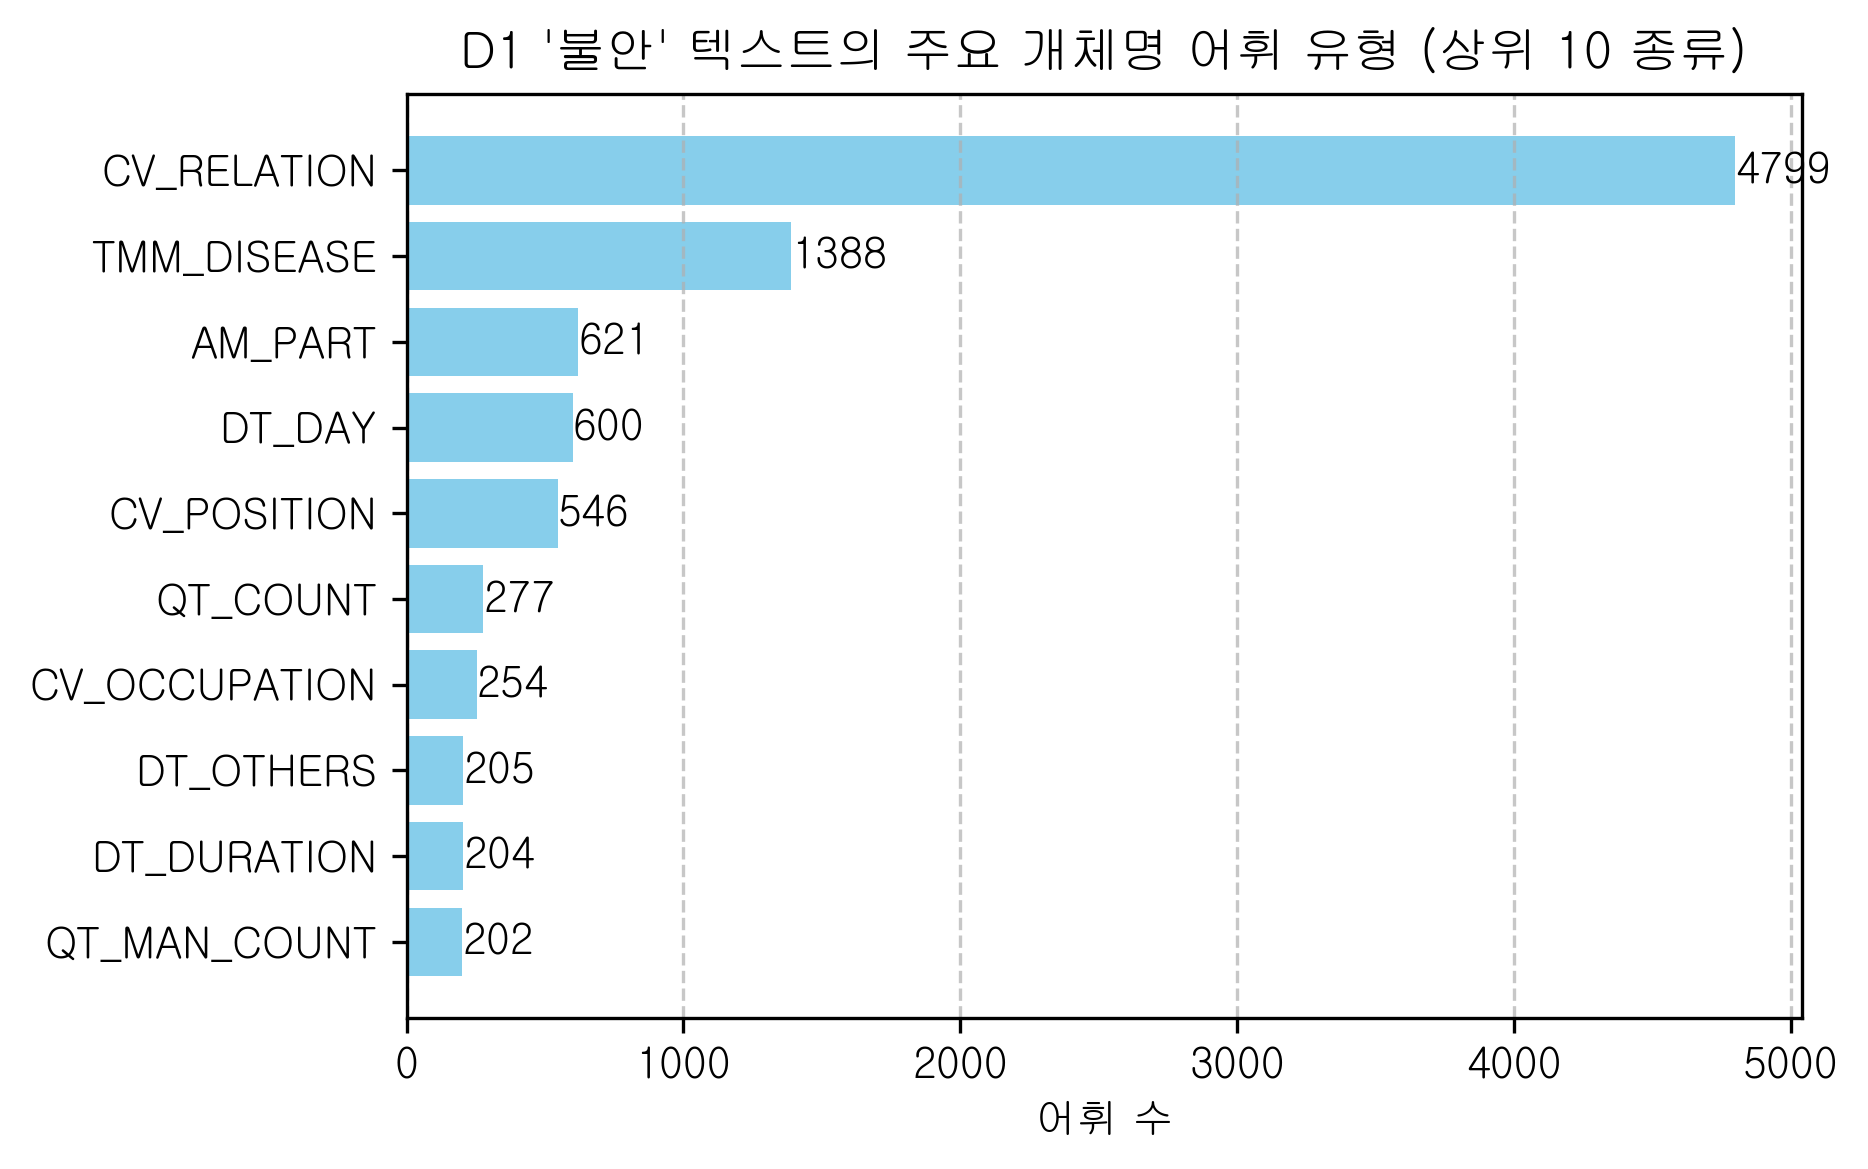

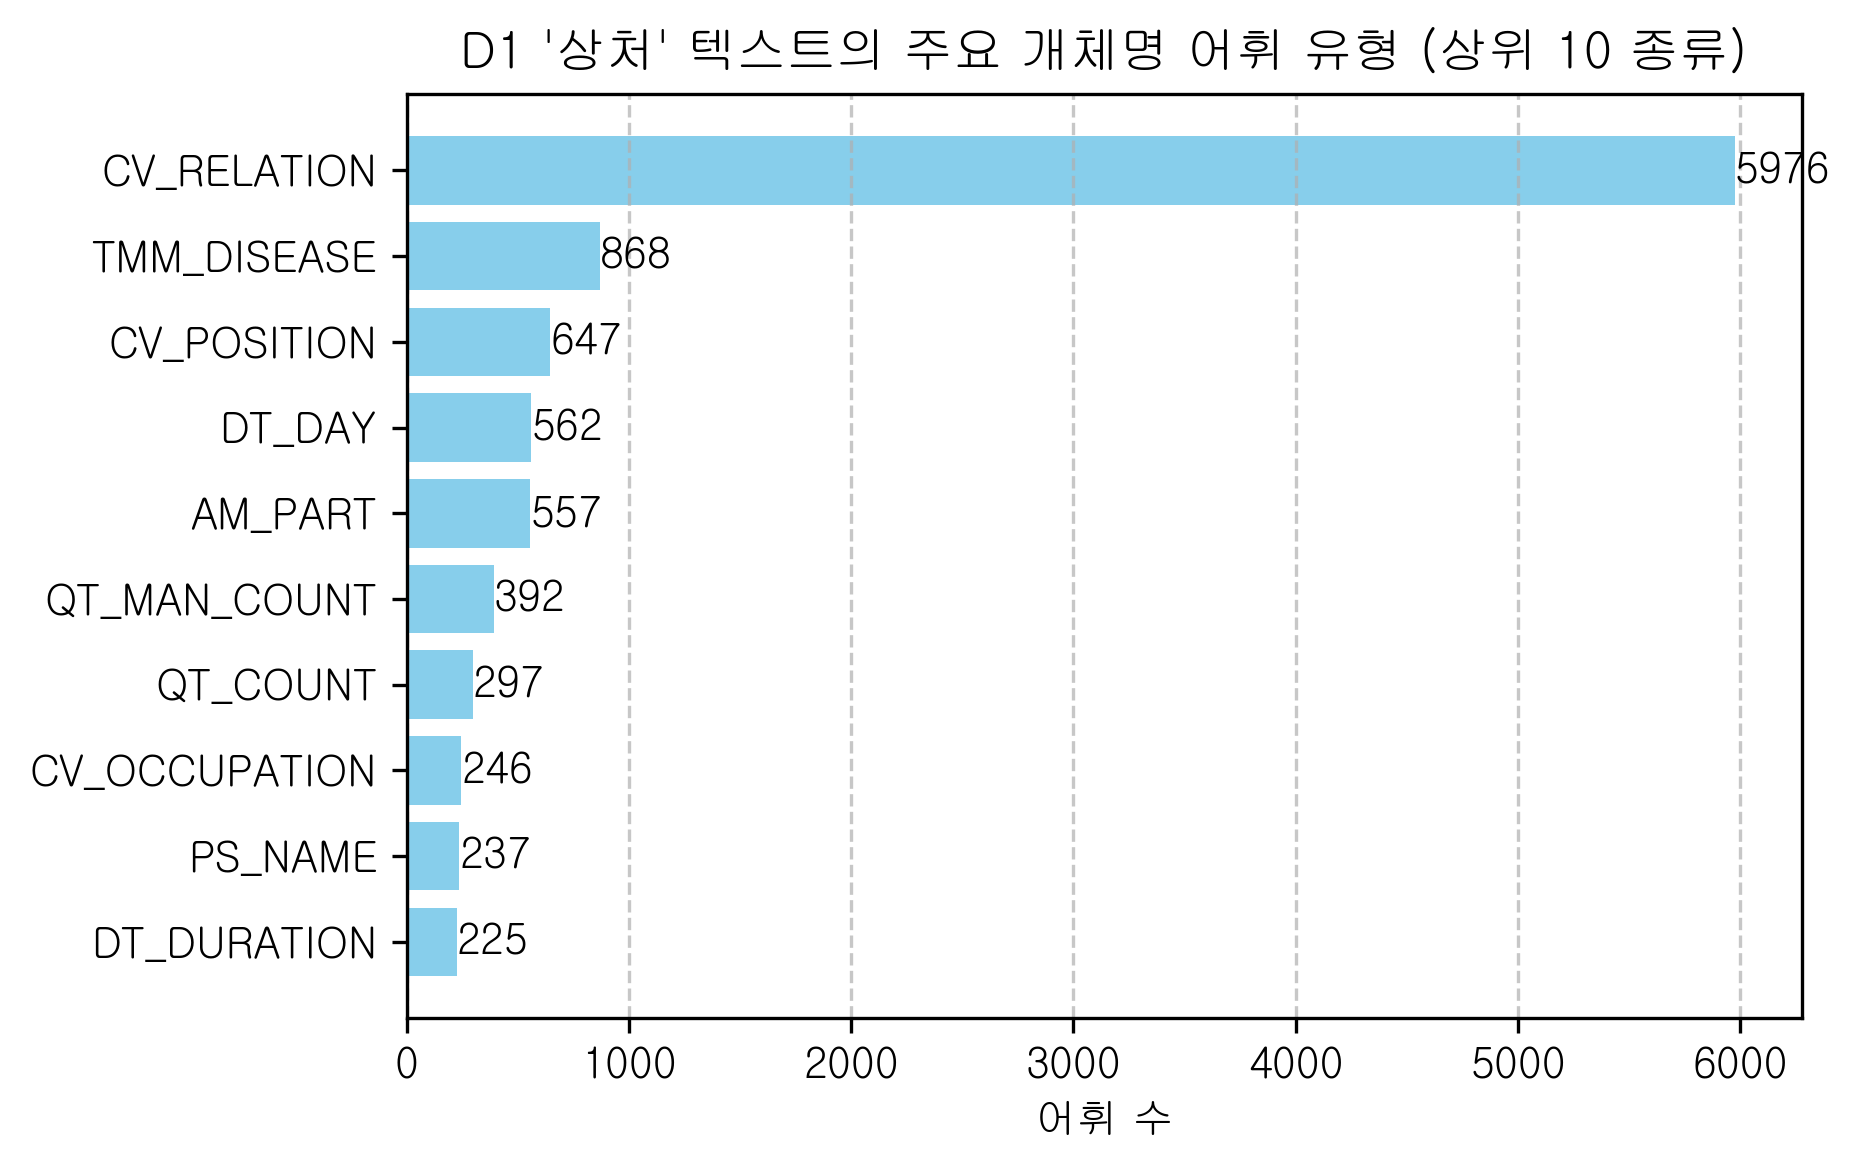

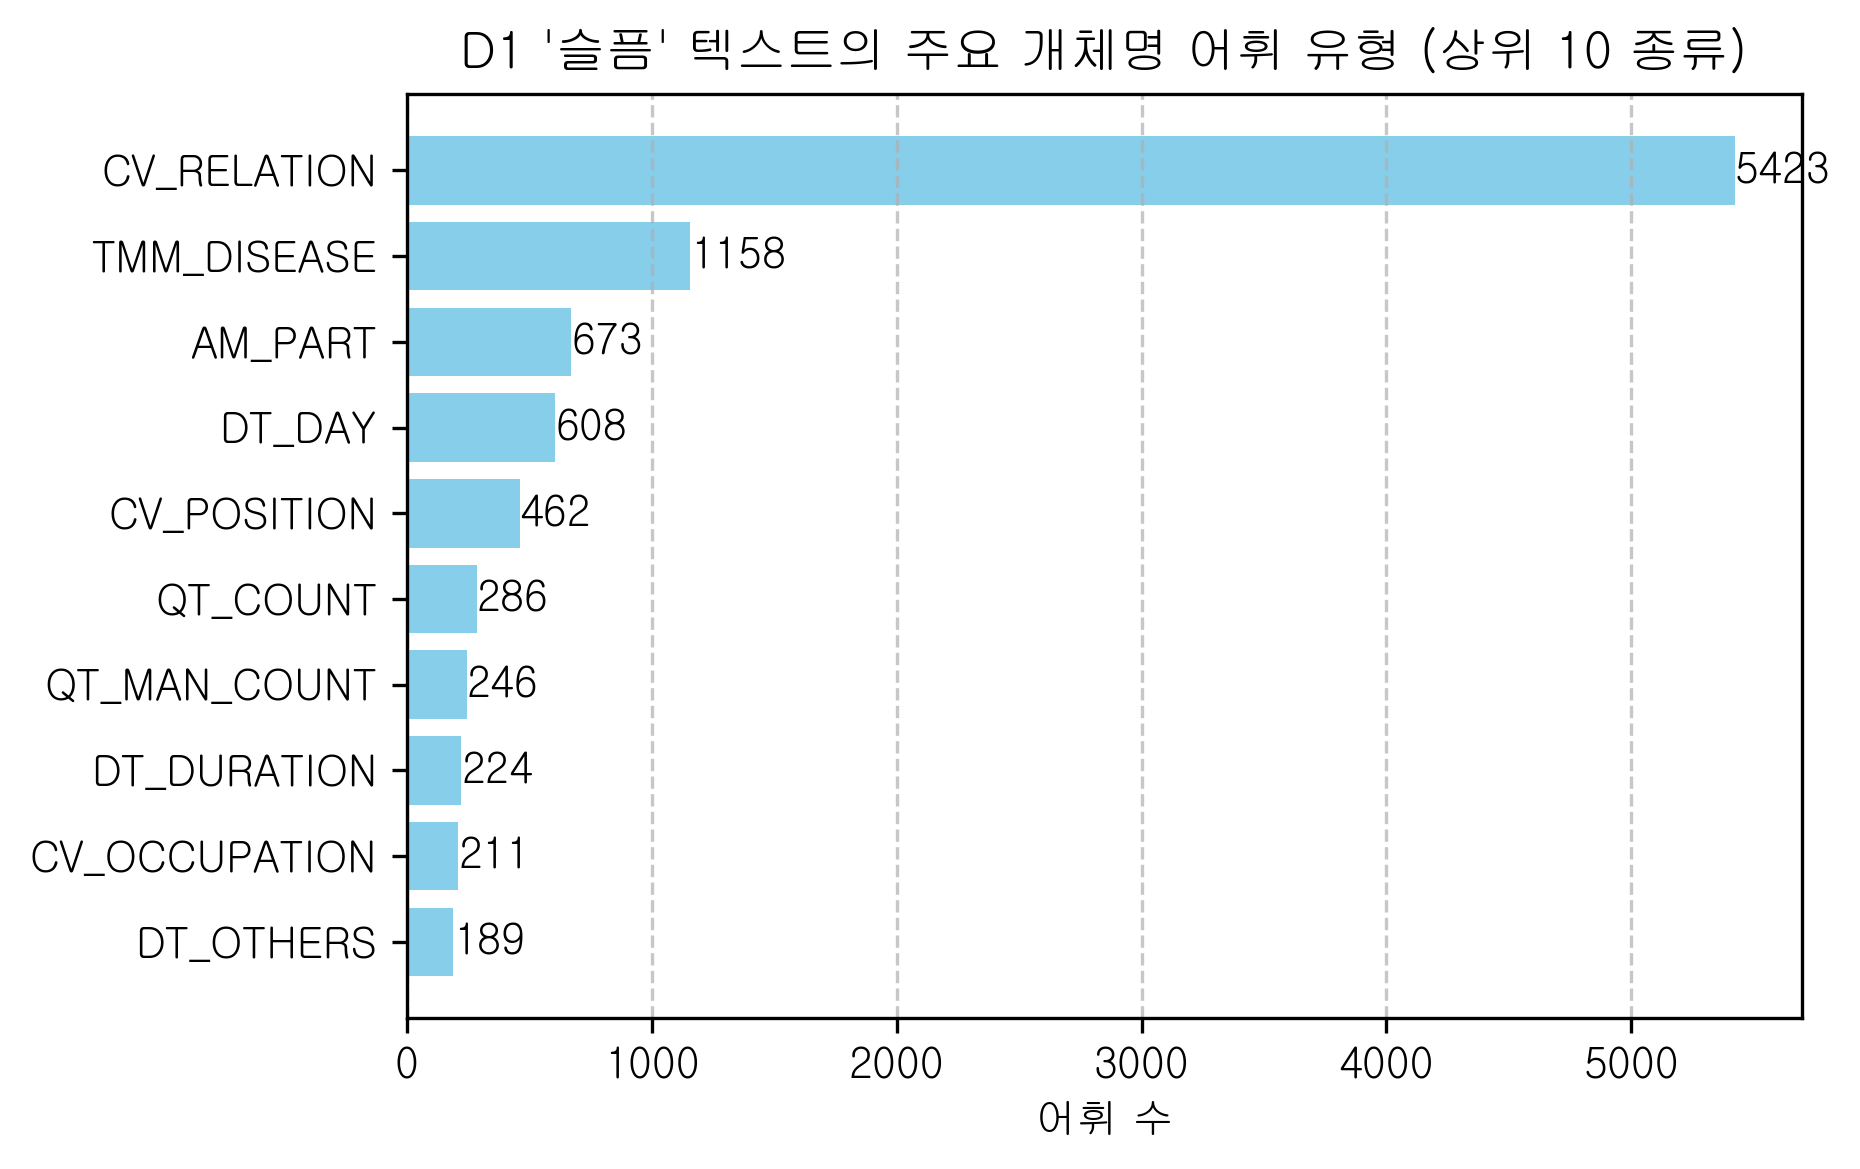

In [67]:
for emotion in emotion_ner.keys():
    draw_bar_graph(emotion, 10)

In [74]:
from collections import Counter

# '기쁨' 감정의 'CV_RELATION' 데이터에서 단어들의 빈도수 계산
#word_counts = Counter(emotion_ner['분노']['CV_RELATION'])
word_counts = Counter(emotion_ner['분노']['TMM_DISEASE'])

# 빈도수가 높은 순으로 단어들 정렬
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# 결과 출력
for word, count in sorted_word_counts:
    print(f"{word}: {count}")

스트레스: 152
치매: 57
우울증: 53
암: 47
코로나: 46
당뇨: 32
고혈압: 27
갱년기: 25
간암: 18
신경질: 17
만성질환: 16
폐암: 16
관절염: 15
감기: 12
천식: 11
위암: 9
골다공증: 8
유방암: 8
탈모: 8
공황장애: 8
기침: 7
당뇨병: 7
신체장애: 7
비만: 6
마비: 6
건망증: 6
허리디스크: 6
정신질환: 6
폐렴: 5
만성 질환: 5
장염: 4
요통: 4
뇌졸중: 4
심근경색: 4
정신장애: 4
알코올 중독: 3
고지혈증: 3
코로나 일구: 3
열사병: 3
대장암: 3
류머티즘 관절염: 3
난청: 3
독감: 3
정신 장애: 3
틱 장애: 3
조울증: 3
자궁경부암: 2
녹내장: 2
몸살: 2
성인병: 2
류머티즘: 2
심장병: 2
기관지염: 2
입덧: 2
뇌출혈: 2
화병: 2
감염병: 2
짜증: 2
당뇨 합병증: 2
요실금: 2
비염: 2
소아암: 2
편두통: 2
기립성 저혈압: 2
백내장: 2
다크서클: 2
야뇨증: 2
갱년기 우울증: 2
뇌경색: 2
허리 통증: 2
의처증: 2
알코올중독: 2
중증질환: 2
불면증: 2
아토피: 2
폐경: 2
허리통증: 2
소아마비: 2
틱장애: 2
코골: 2
백혈병: 2
정신병: 2
불안장애: 2
청각장애: 2
여드름: 2
위염: 2
협착증: 1
청각 장애: 1
전립선 비대증: 1
히스테리: 1
산후 우울증: 1
물건: 1
건강 염려증: 1
헤르페스: 1
눈병: 1
코로나일구: 1
당뇨약: 1
천식발작: 1
폐질환: 1
당뇨 약: 1
가래: 1
울화통: 1
과민대장증후군: 1
협심증: 1
결핵: 1
이명: 1
변비: 1
당뇨합병증: 1
간경화: 1
허리 디스크: 1
괴롭힘: 1
두통: 1
대사증후군: 1
배탈: 1
동맥경화: 1
당뇨 고혈압: 1
심장질환: 1
신부전증: 1
기저질환: 1
정신 질환: 1
의부증: 1
시각장애: 1
과잉행동 장애: 1
전 암: 1
주부우울증: 1
게임 중독: 1
췌장암: 1
폐소 공포증: 1
공황 장애: 1
기억 상실증: 1
갑

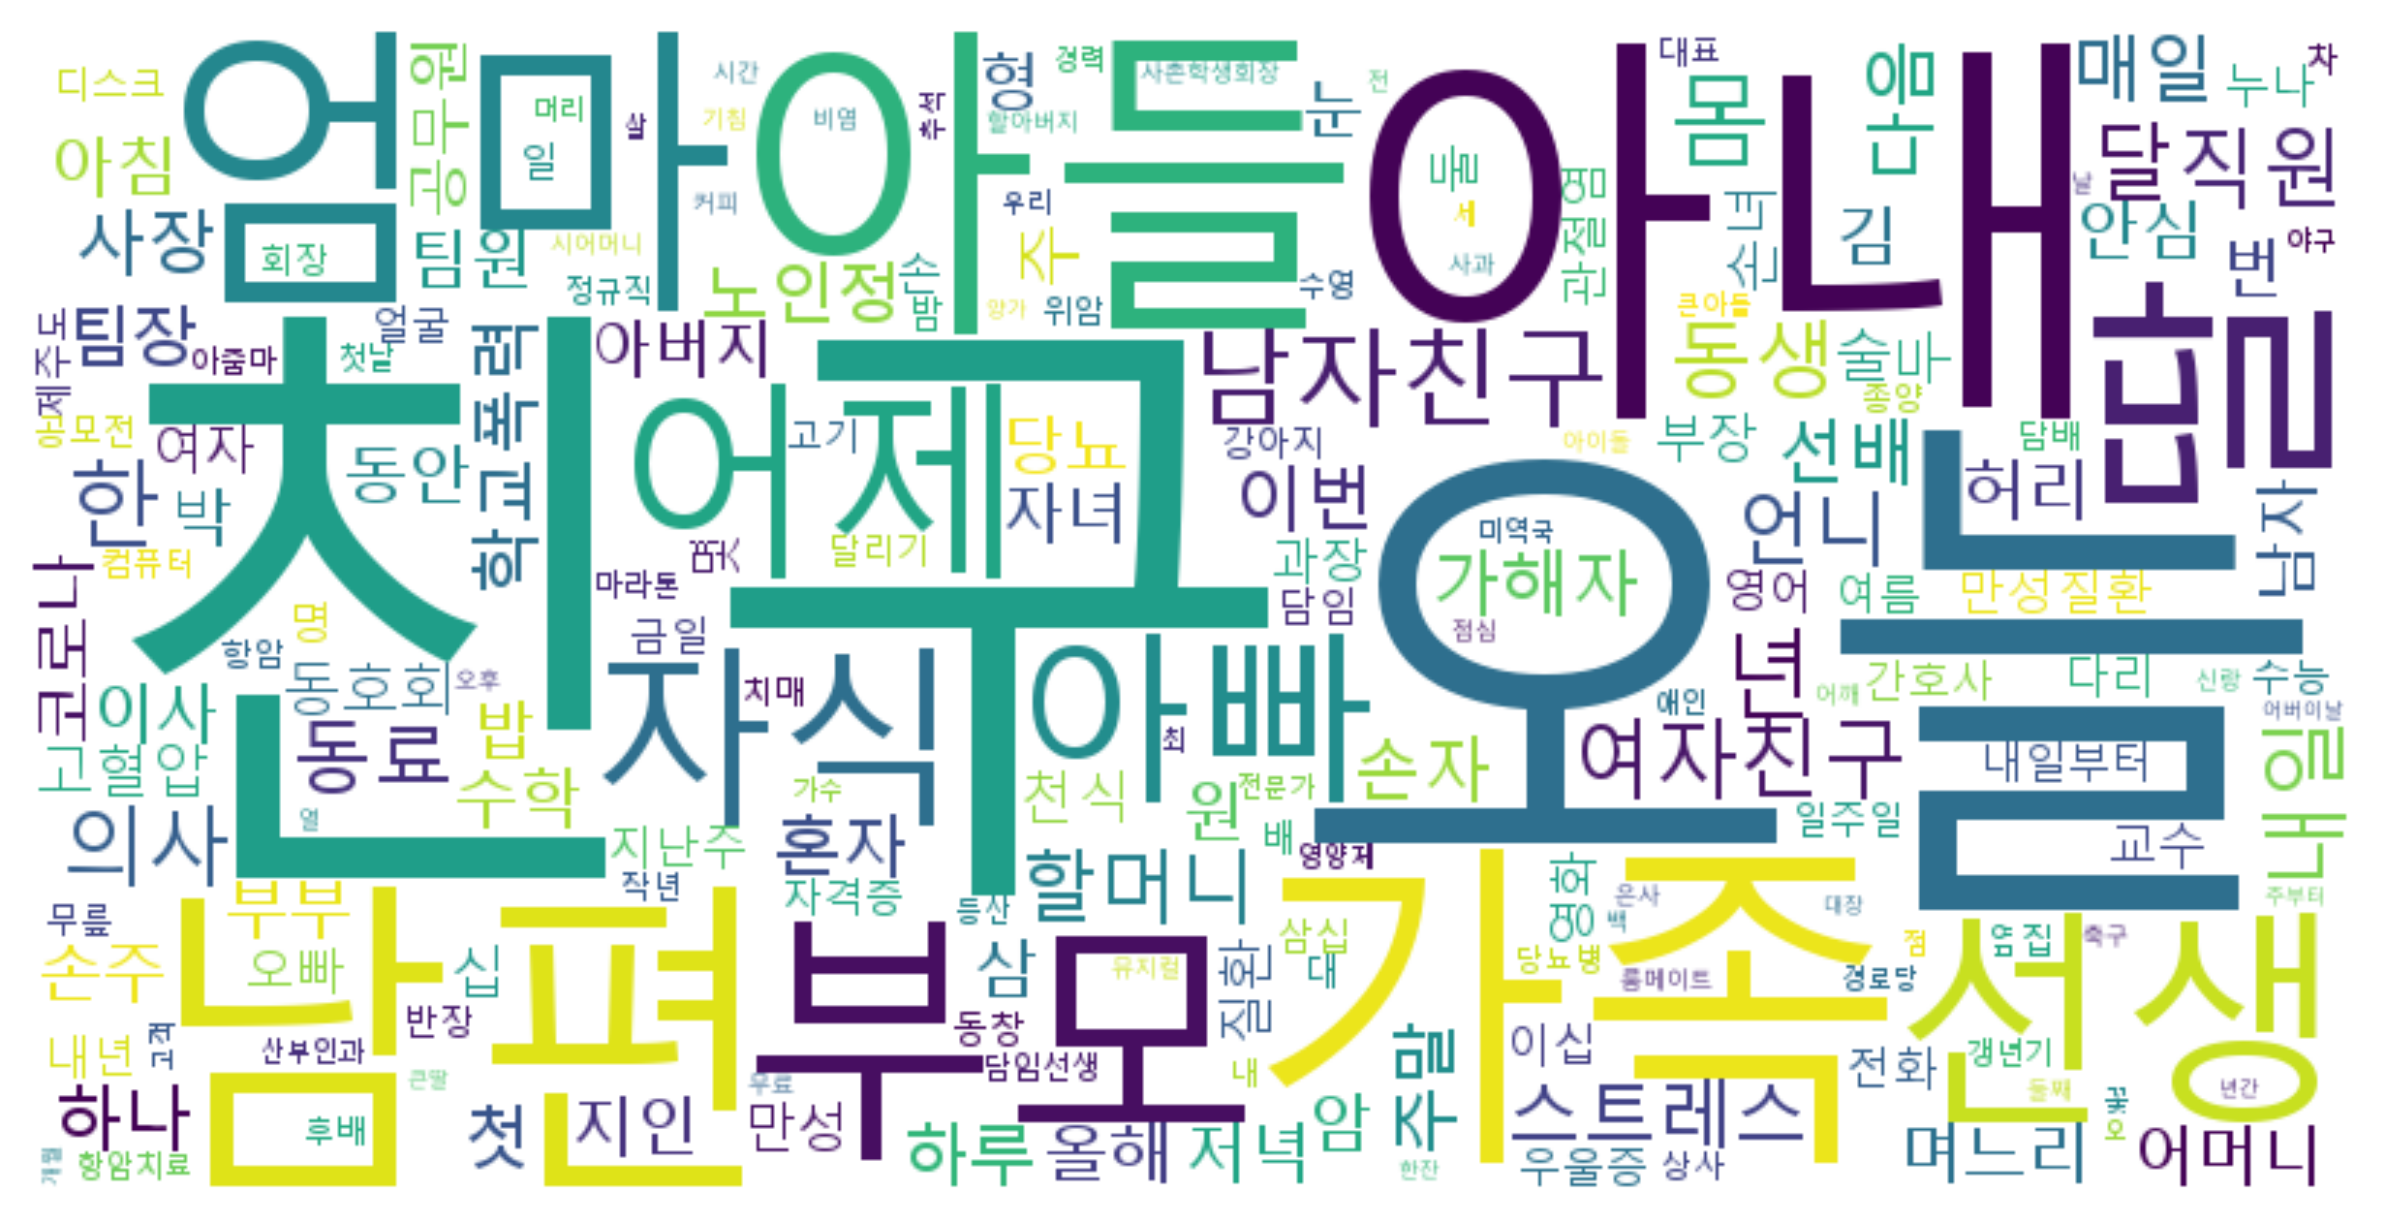

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['기쁨'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

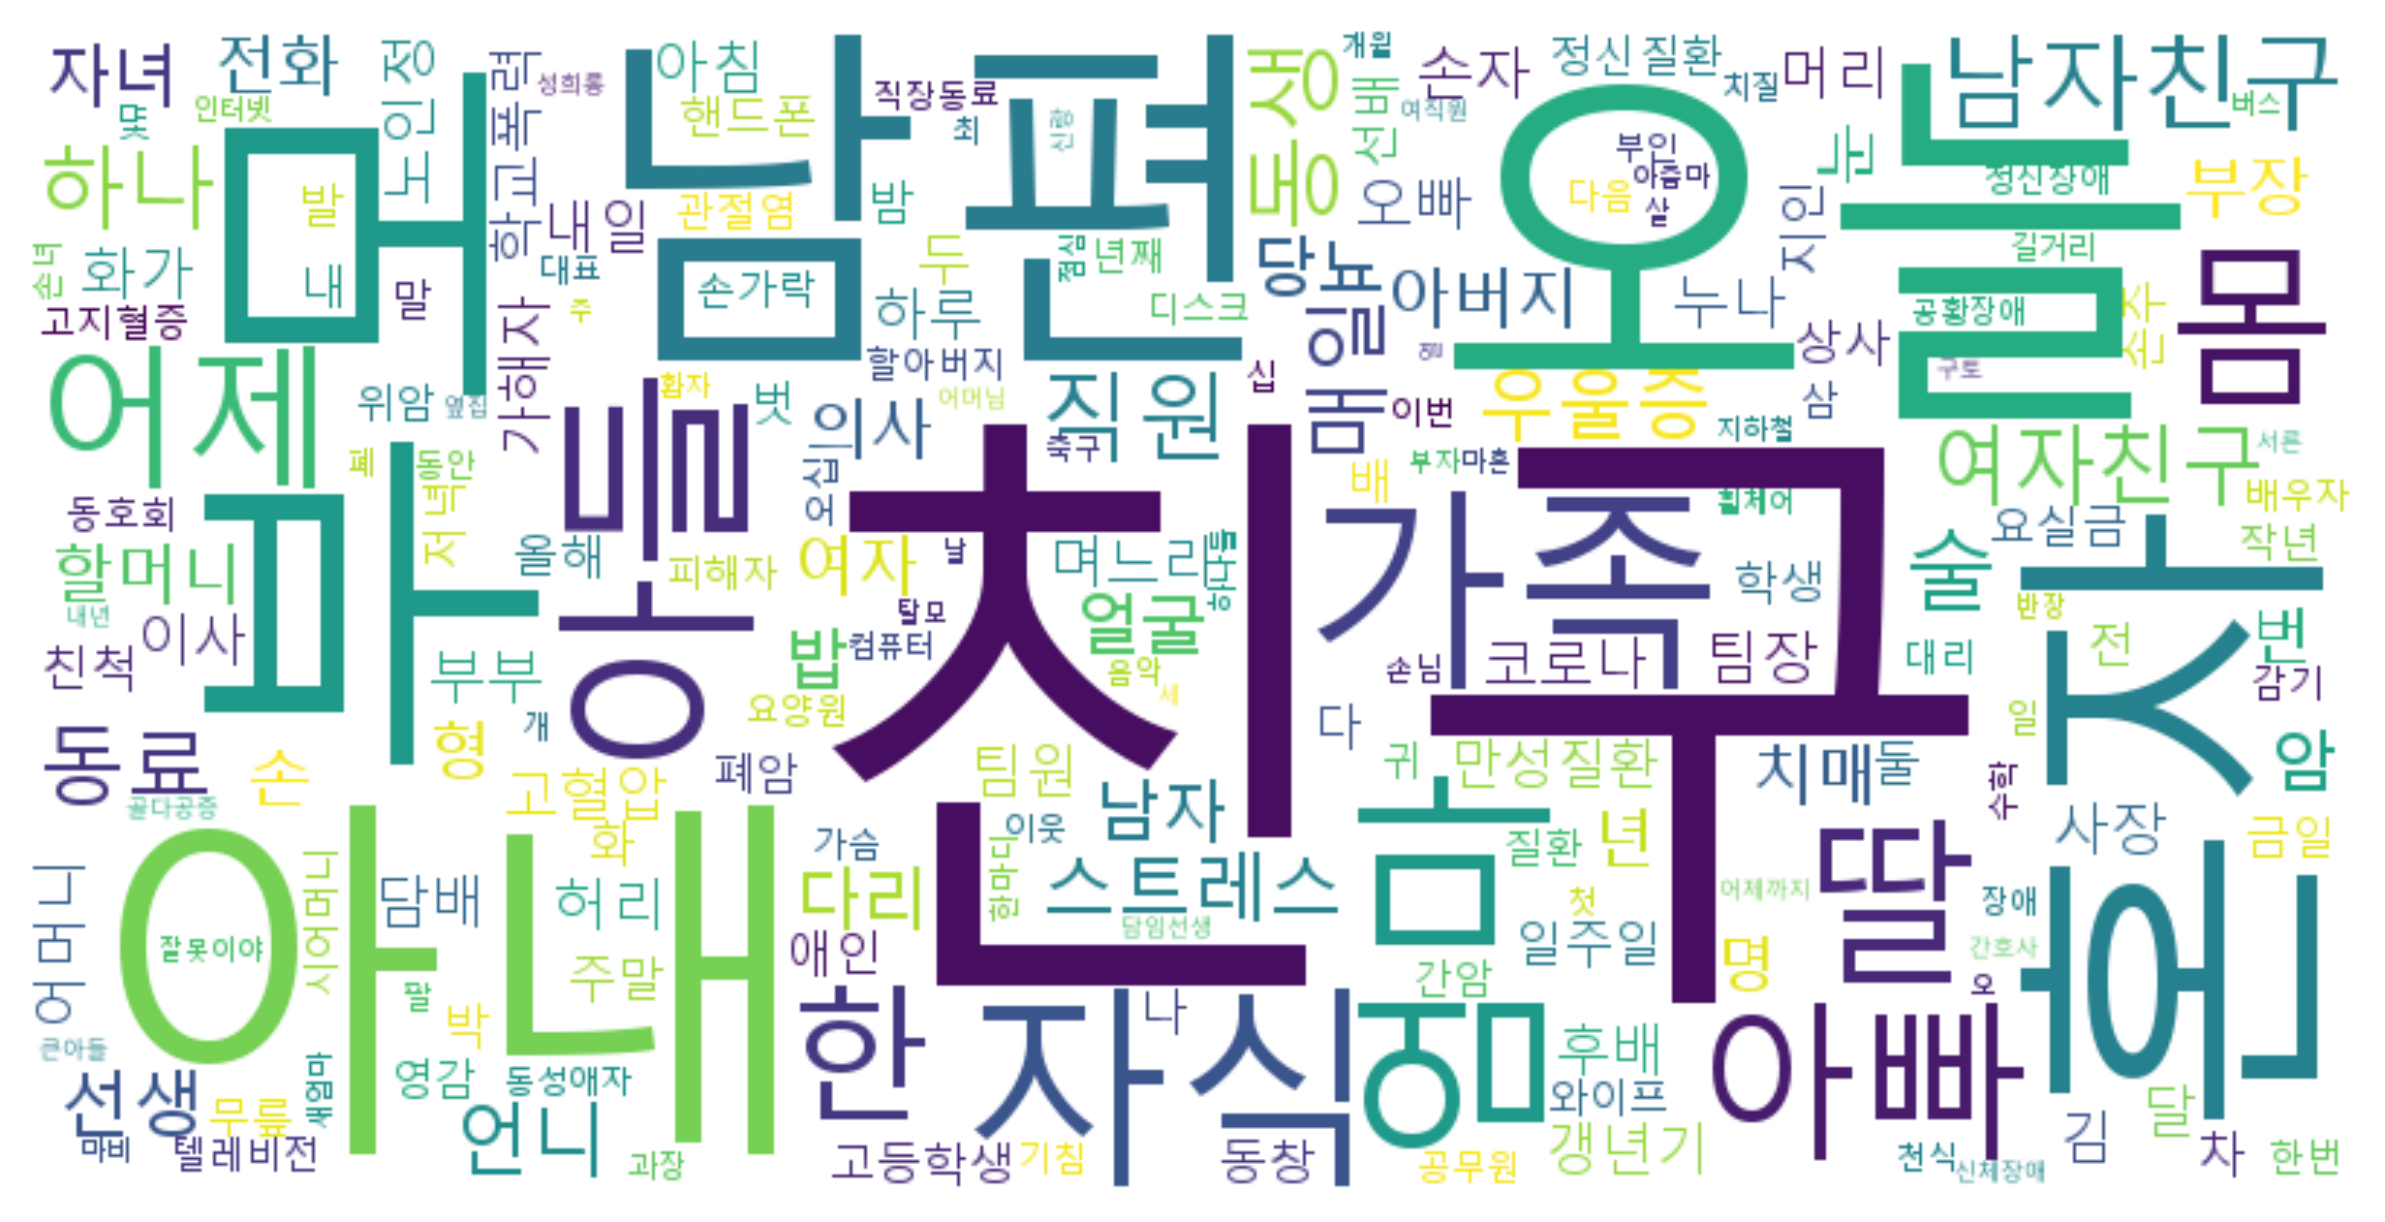

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['당황'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

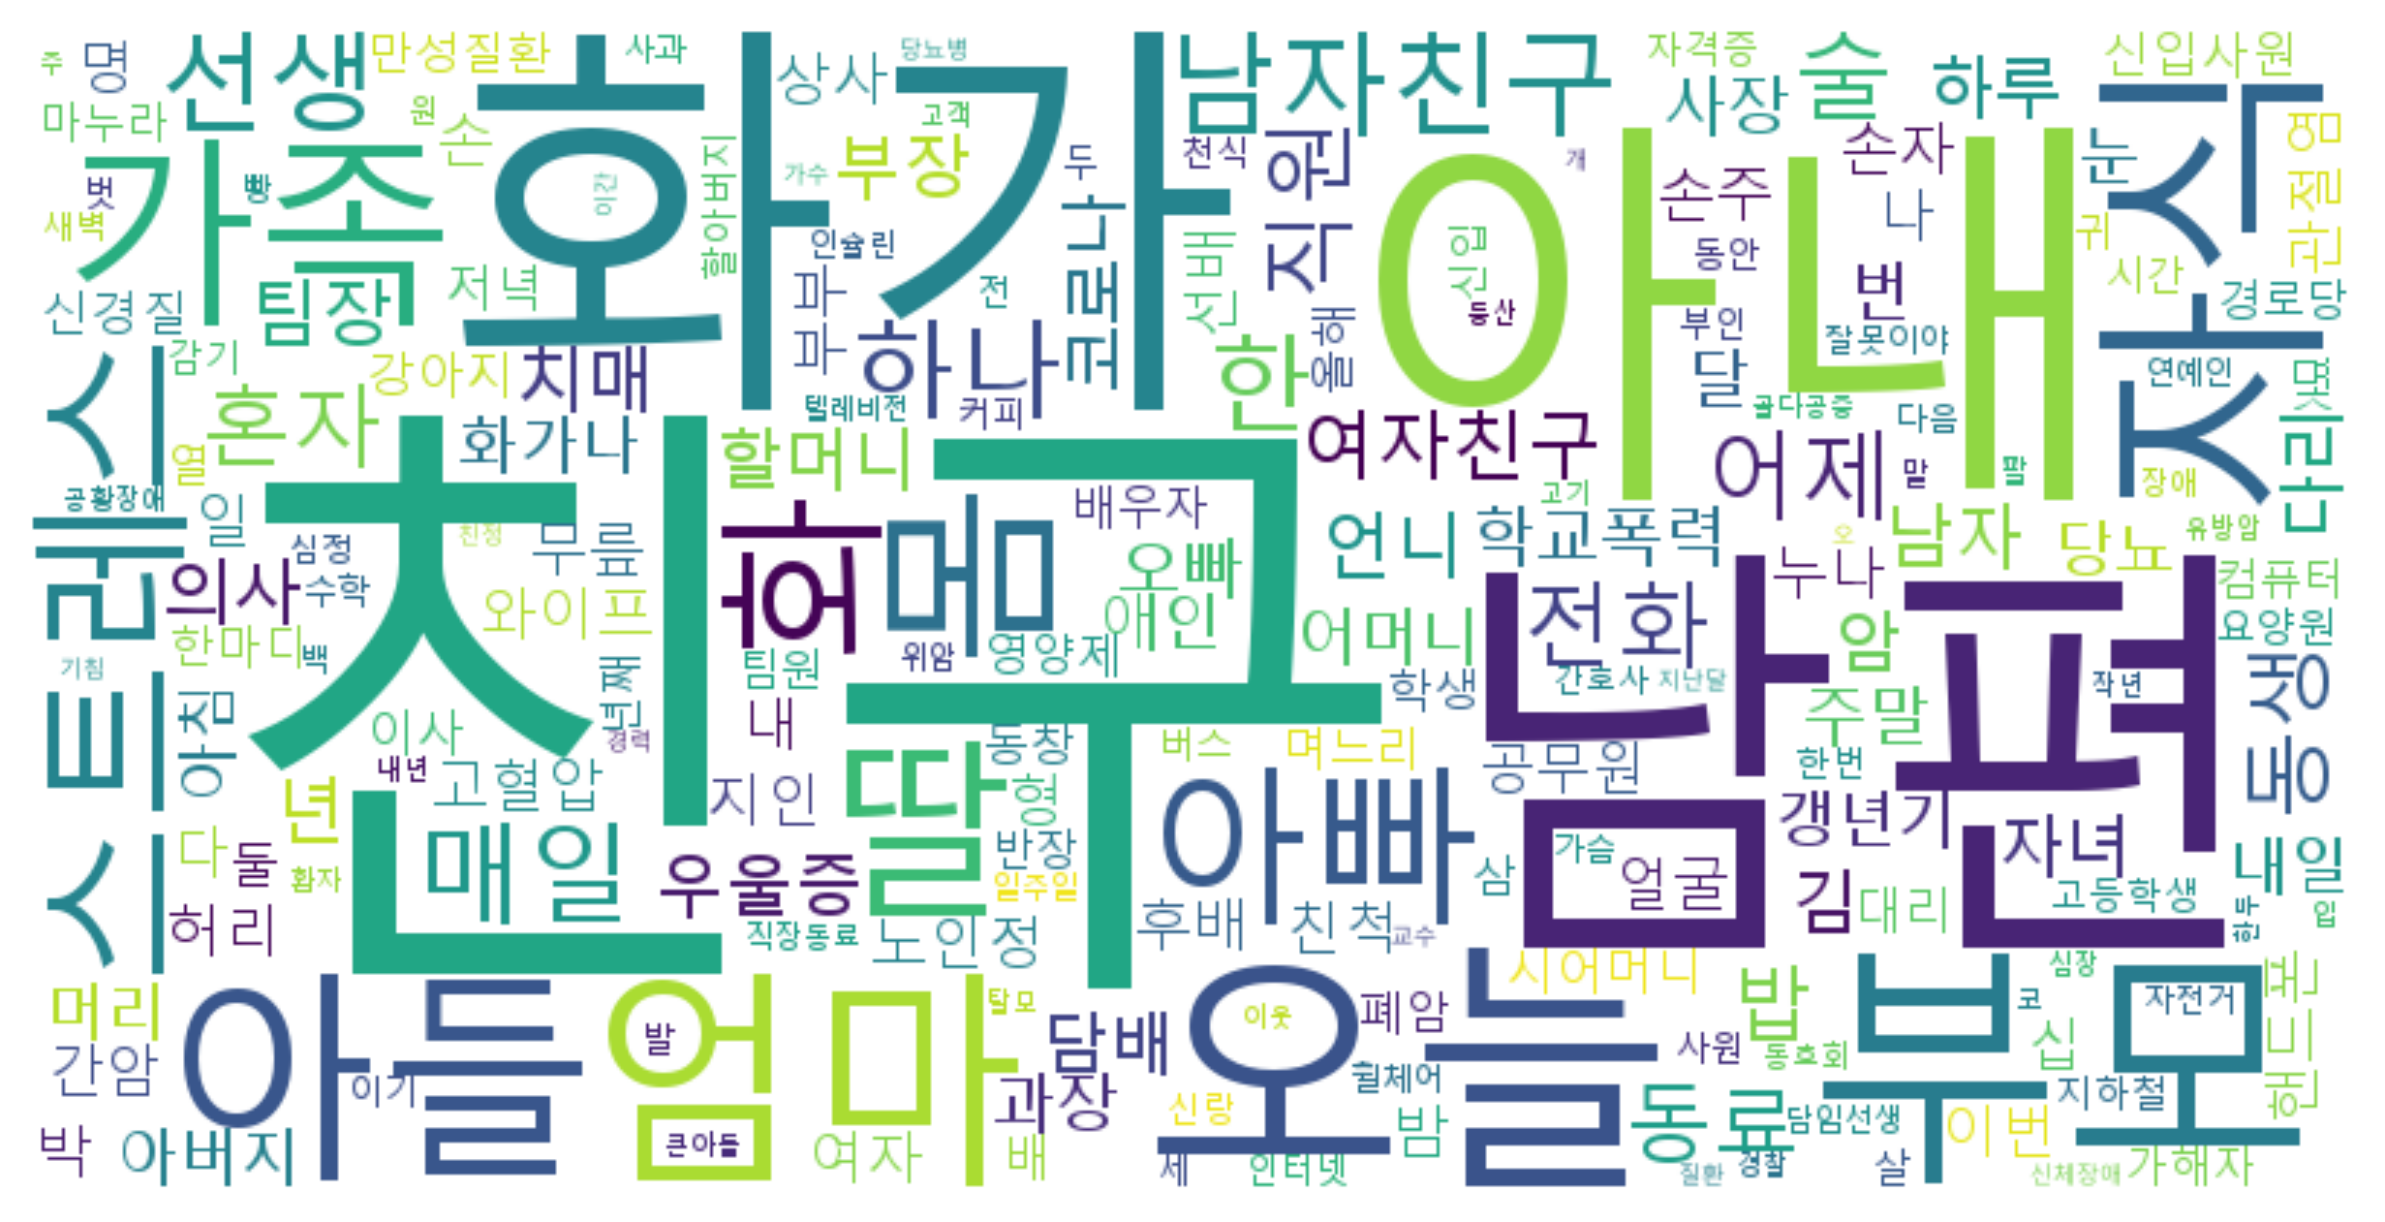

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['분노'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

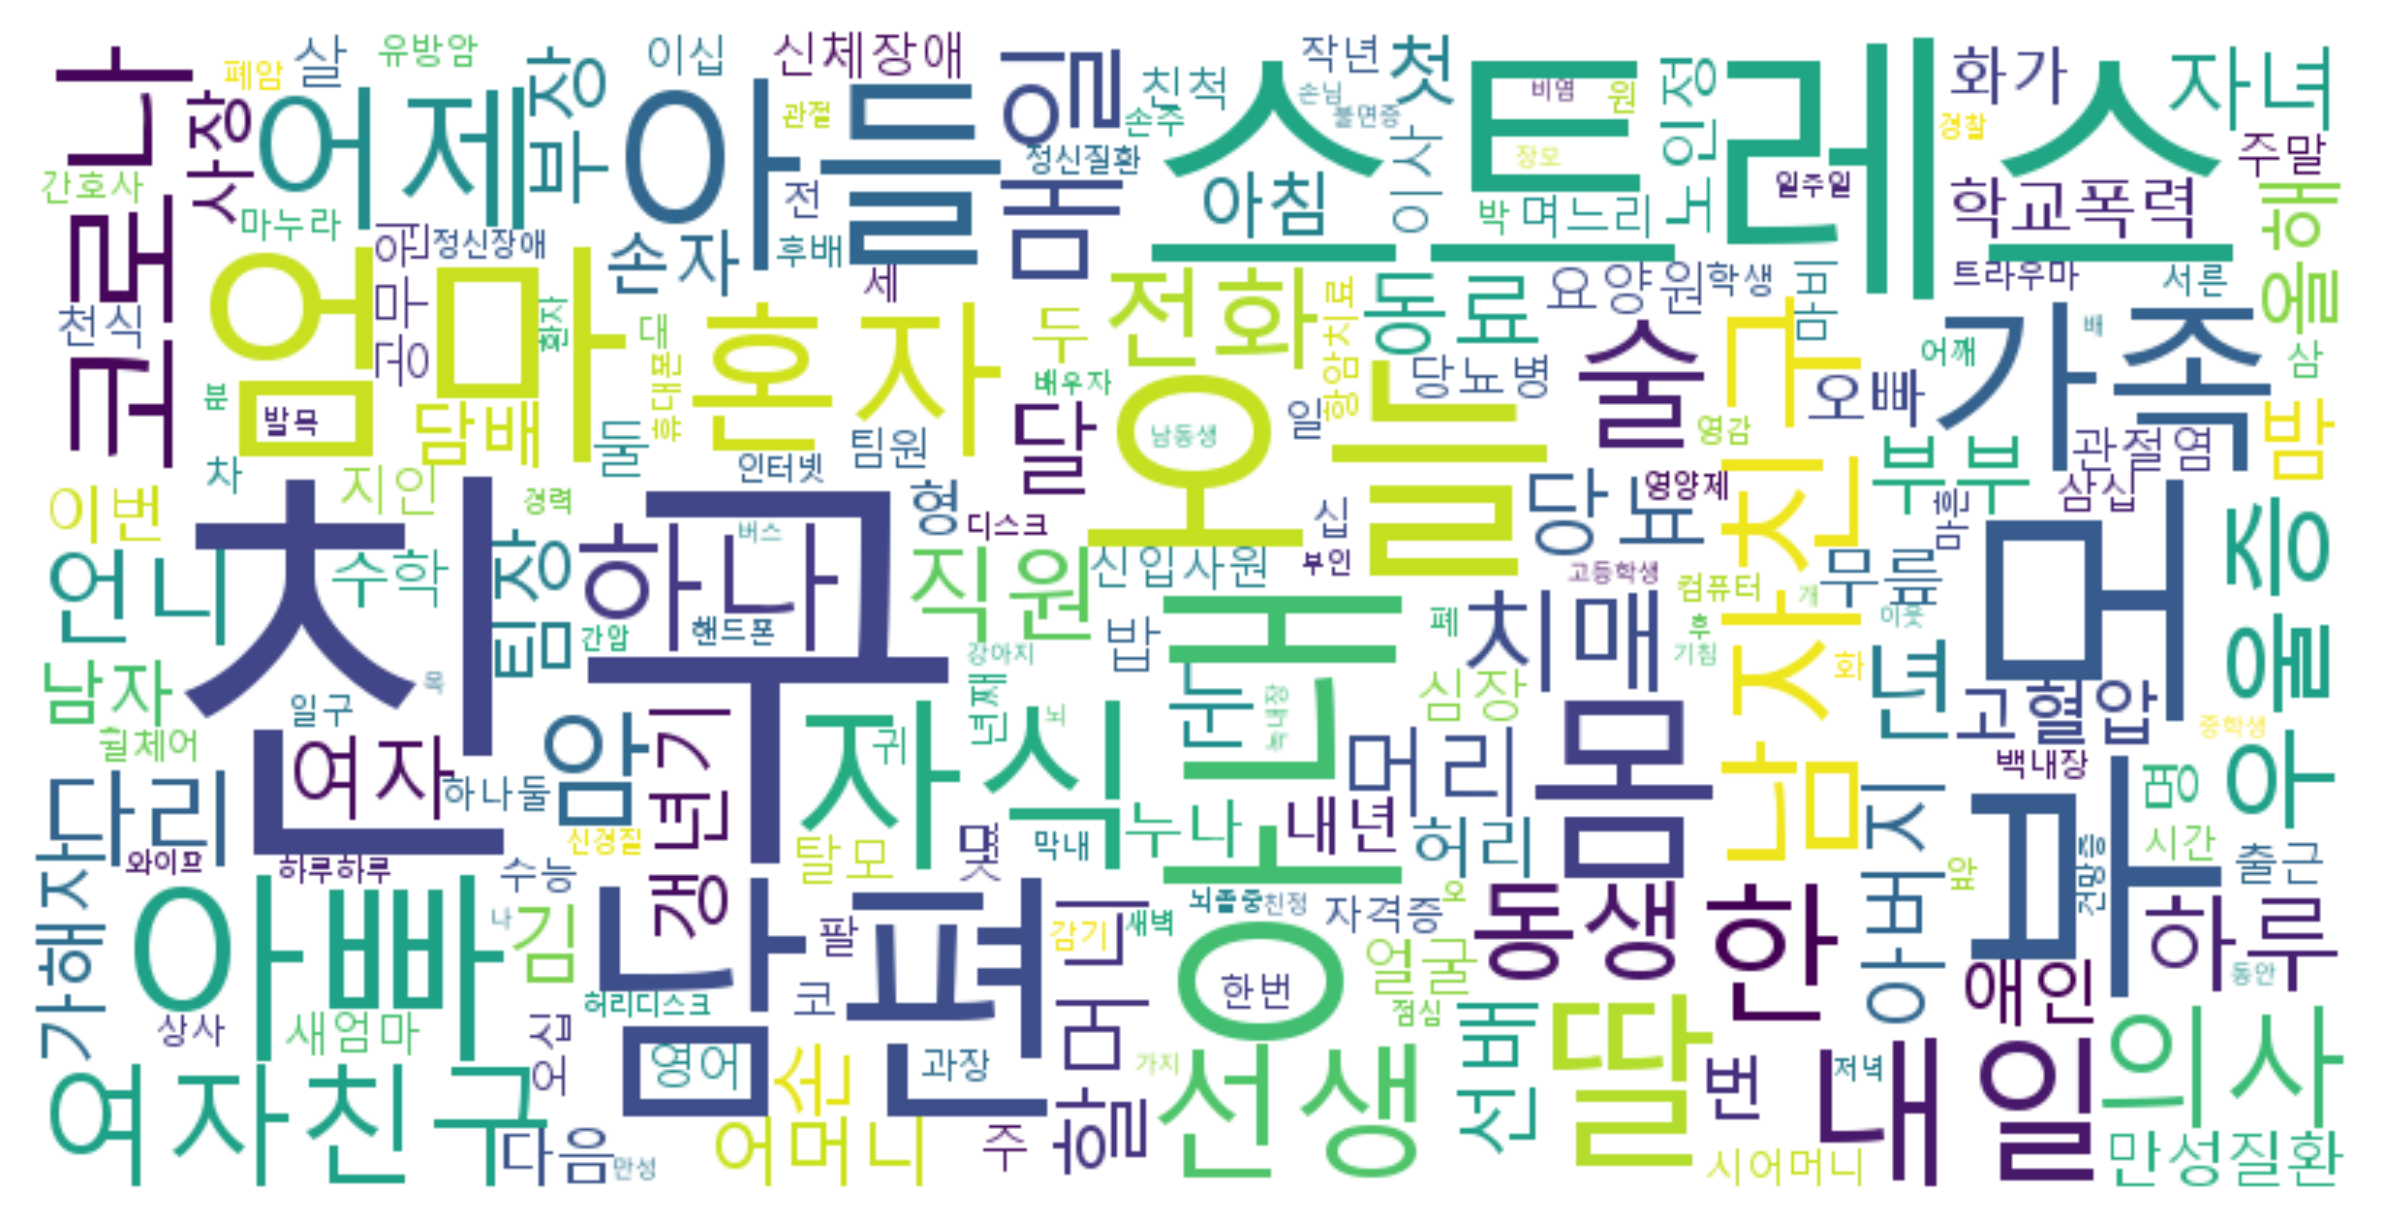

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['불안'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

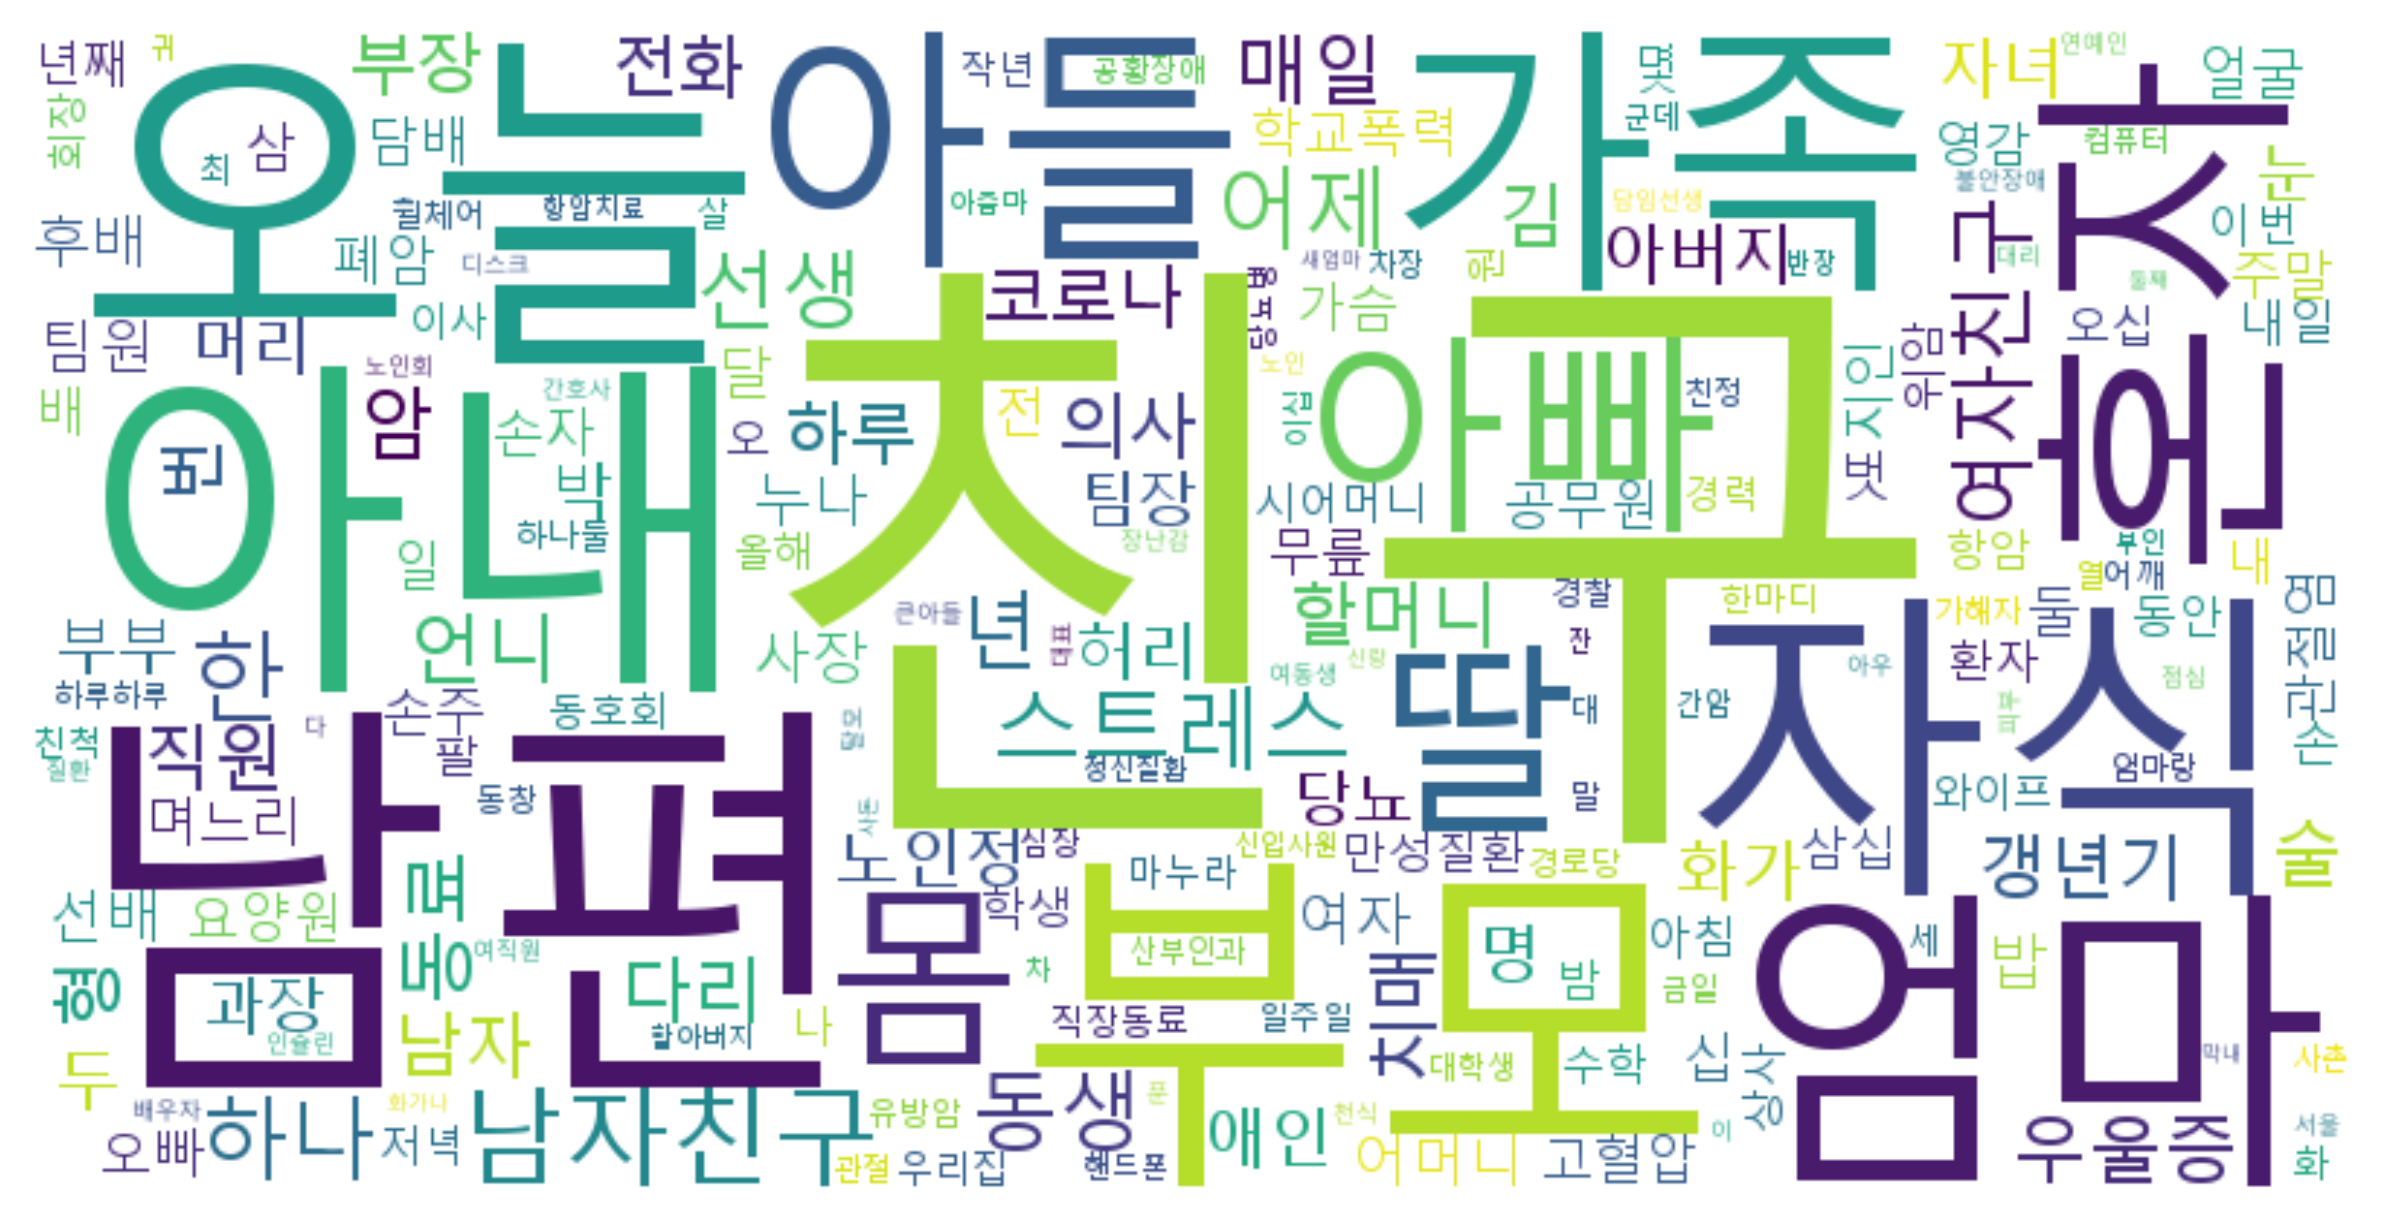

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['상처'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

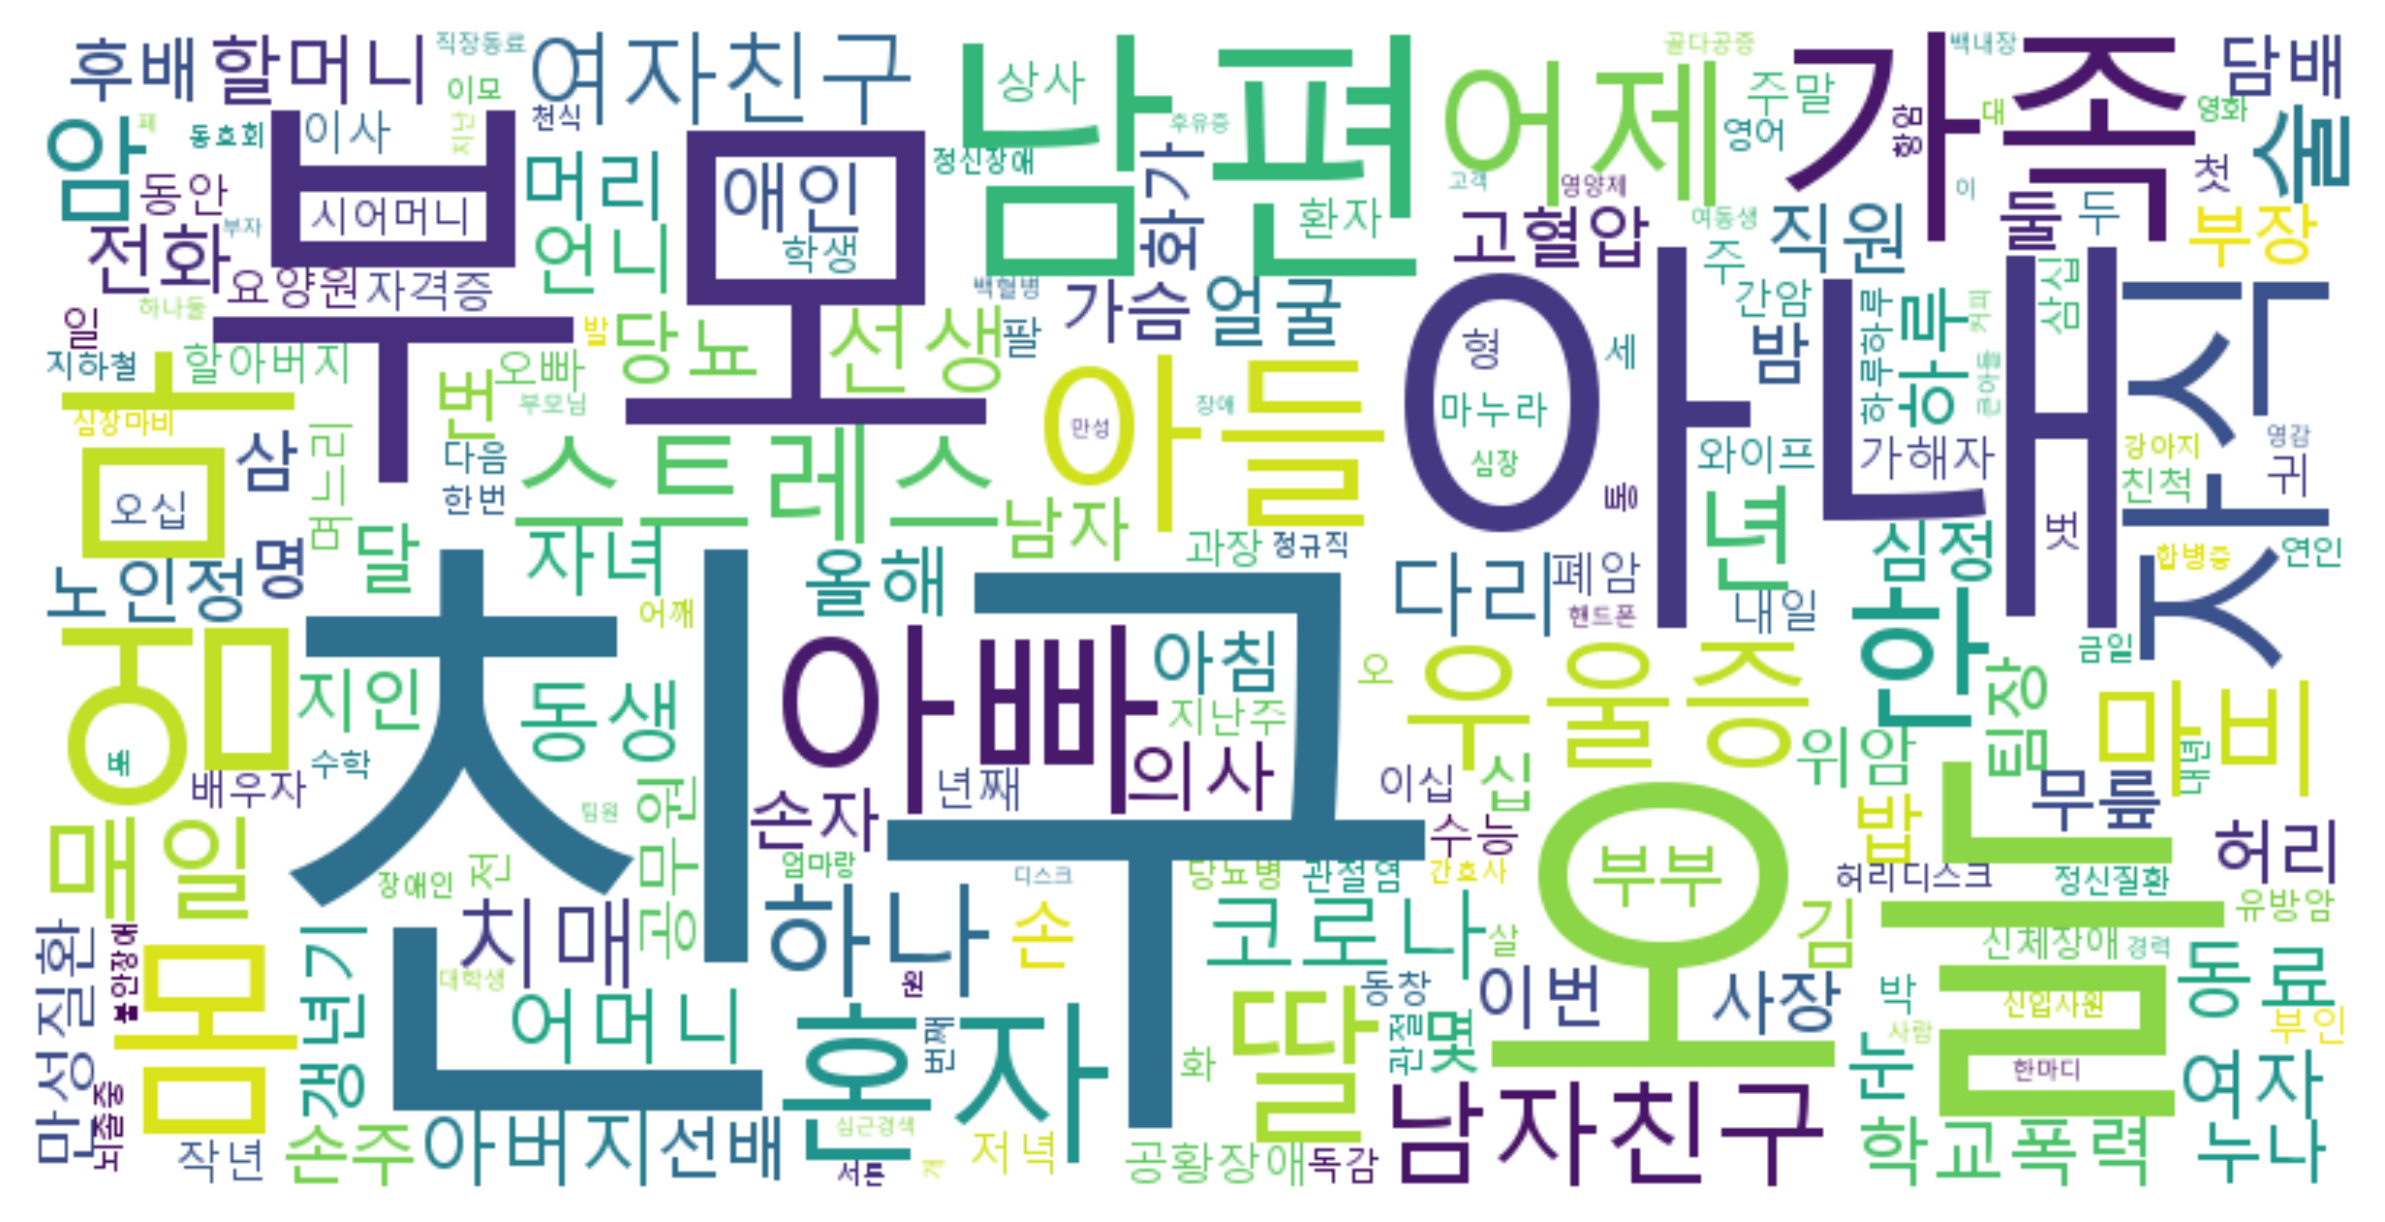

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

text = ''
for tag, words in emotion_ner['슬픔'].items():
    text += ' '.join(words)
    
# 텍스트를 공백 기준으로 분리하여 단어의 출현 빈도 계산
word_counts = Counter(text.split())

# WordCloud 객체 생성 시, 빈도 정보와 함께 이미지 크기를 높여서 고해상도로 설정
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 표시, dpi 값을 높여서 해상도 개선
plt.figure(figsize=(10, 6), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()